In [1]:
#PING www.uruguay.gub.uy (179.27.170.110) 56(84) bytes of data.

In [2]:
import re
import numpy as np

pattern = r"\[(\d+\.\d+)] .* icmp_seq=(\d+) .* time=(\d+) ms"

f = open("data.txt", "r")
parsed_entries = []


for i, line in enumerate(f):
    if i > 36000:
        break
    match = re.search(pattern, line)
    if match:
        timestamp = float(match.group(1))
        seq = int(match.group(2))
        time = int(match.group(3))
        parsed_entries.append((timestamp, seq, time))


times = np.array([entry[0] for entry in parsed_entries])
seq = np.array([entry[1] for entry in parsed_entries])
rtt = np.array([entry[2] for entry in parsed_entries])

times -= times[0]

In [3]:
#Q1: What  was  the  overall  delivery  rate  over  the  entire  interval?

print("Q1: The overall delivery rate over the entire interval is: ", len(seq)/seq[-1])

Q1: The overall delivery rate over the entire interval is:  0.9981700216270172


In [4]:
#Q2: What  was  the  longest  consecutive  string  of  successful  pings 

t = 0
maxlen = 0
for i in range(len(seq)-1):
    if seq[i] +1 == seq[i+1]:
        t+=1
    else:
        maxlen = max(maxlen, t)
        t = 0
print("Q2: The longest consecutive string of successful pings is: ", maxlen)


Q2: The longest consecutive string of successful pings is:  2718


In [5]:
#Q4: What  was  the  longest  burst  of  losses
maxlen = 0
for i in range(len(seq)-1):
    maxlen = max(maxlen, seq[i+1] - seq[i] - 1)

print("Q4: The longest burst of losses is: ", maxlen)

Q4: The longest burst of losses is:  4


In [6]:
#Q5

ack = np.zeros(seq[-1])
seq = np.array(seq)

ack[seq-1] = 1

ack_ack = 0
ack_nak = 0

for i in range(len(ack) - 1):
    if ack[i+1] == 1:
        if ack[i] == 1:
            ack_ack+=1
        else:
            ack_nak+=1

# Probability of #N ack and #(N+1) ack
print("Q5: The probability of #N ack and #(N+1) ack is: ", ack_ack/ack.sum())

# Probability of #N nak and #(N+1) ack
print("Q5: The probability of #N nak and #(N+1) ack is: ", ack_nak/(1-ack).sum())

print("It seems that given the last packet is received a reply, under which condition, the next packet is received a reply is more likely to be received a reply. P(ack | last ack ) > P(overall ack)")
print("And given  the  last  packet  is  not  received  a  reply,  under  which  condition,  the  next  packet  is  received  a  reply  is  less  likely  to  be  received  a  reply.  P(ack | last nak ) < P(overall ack")
print("It suggests that the losses are likely to happen in a burst, and the independency is low.")



Q5: The probability of #N ack and #(N+1) ack is:  0.9982222222222222
Q5: The probability of #N nak and #(N+1) ack is:  0.9545454545454546
It seems that given the last packet is received a reply, under which condition, the next packet is received a reply is more likely to be received a reply. P(ack | last ack ) > P(overall ack)
And given  the  last  packet  is  not  received  a  reply,  under  which  condition,  the  next  packet  is  received  a  reply  is  less  likely  to  be  received  a  reply.  P(ack | last nak ) < P(overall ack
It suggests that the losses are likely to happen in a burst, and the independency is low.


In [7]:
#Q6: What  was  the  minimum  RTT  seen  over  the  entire  interval?
print(f"Q6: The minimum RTT seen over the entire interval is: {min(rtt)} ms")

Q6: The minimum RTT seen over the entire interval is: 392 ms


In [8]:
#Q7: What was  the  maximum  RTT  seen  over  the  entire  interval?
print(f"Q7: The maximum RTT seen over the entire interval is: {max(rtt)} ms")

Q7: The maximum RTT seen over the entire interval is: 558 ms


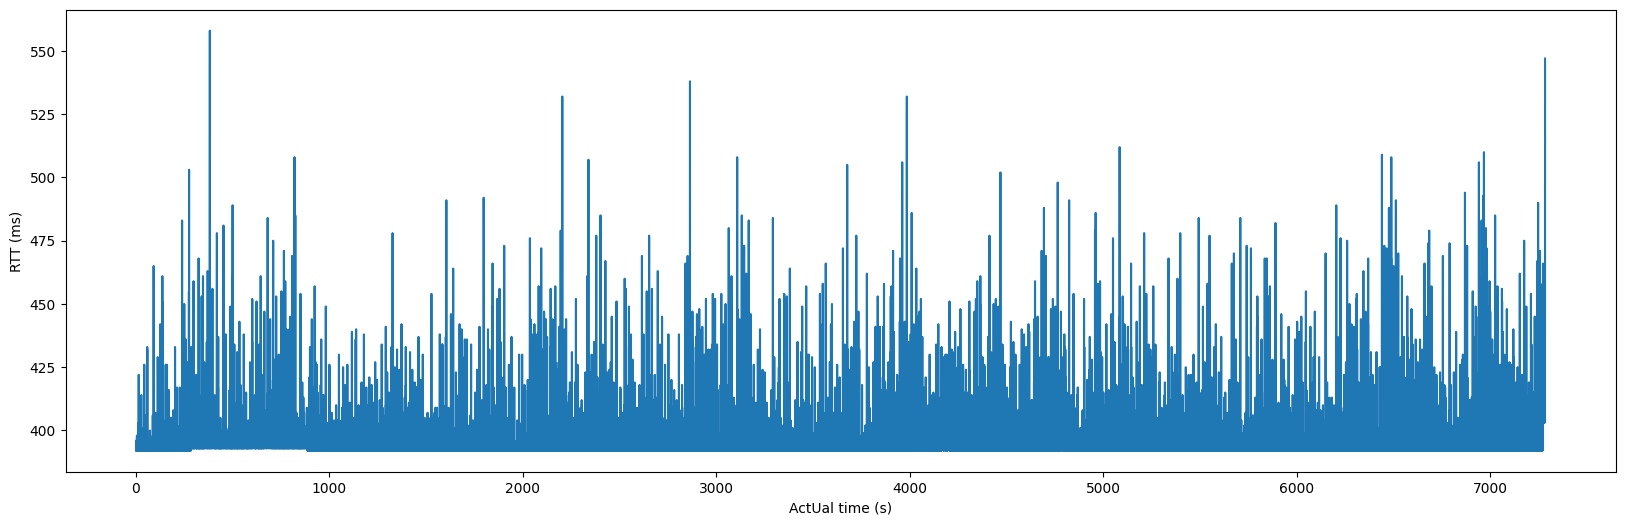

In [9]:
#Q8:Make  a  graph  of  the  RTT  as  a  function  of  time.  Label  the  x-axis  with  the  actual  time  of day  (covering  the  2+-hour  period),  and  the  y-axis  should  be  the  number  of  milliseconds of RTT.
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(times, rtt)
plt.xlabel("ActUal time (s)")
plt.ylabel("RTT (ms)")
plt.show()


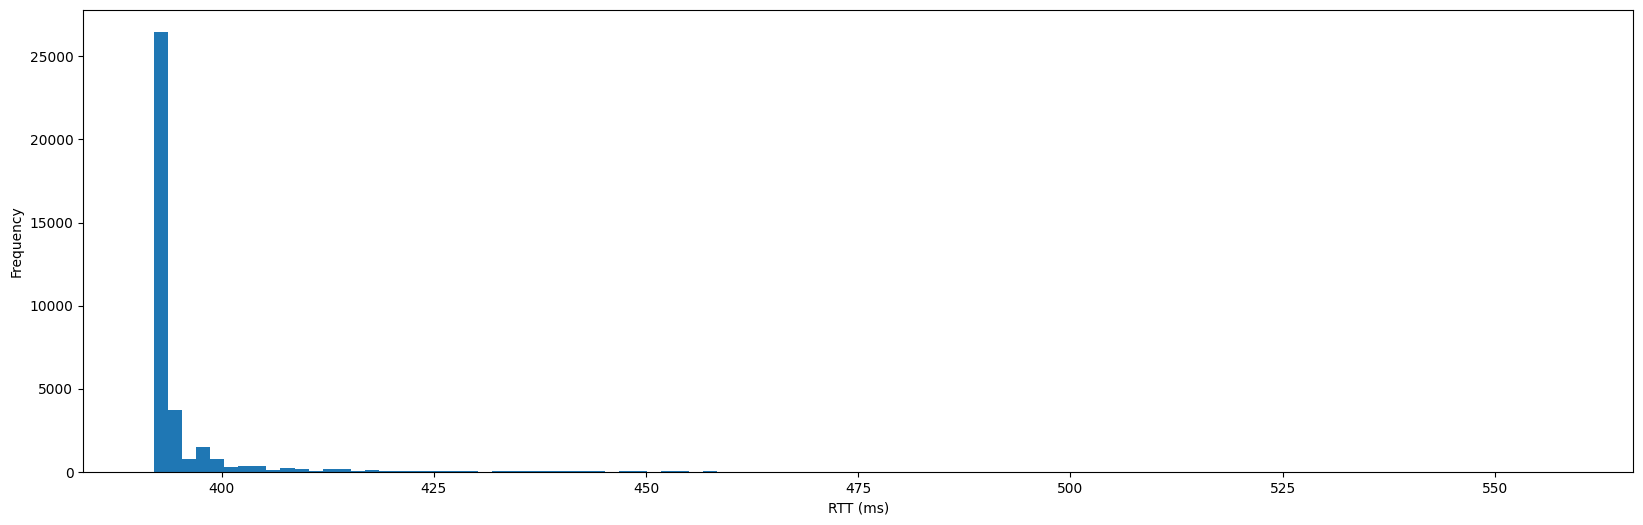

The rough shape of the distribution is right-skewed distribution with a peek on the left and a long tail on the right.


In [10]:
#Q9: Make a histogram or Cumulative Distribution Function of the distribution of RTTs observed. What rough shape is the distribution?
plt.figure(figsize=(20, 6))
plt.hist(rtt, bins=100)
plt.xlabel("RTT (ms)")
plt.ylabel("Frequency")
plt.show()
print('The rough shape of the distribution is right-skewed distribution with a peek on the left and a long tail on the right.')

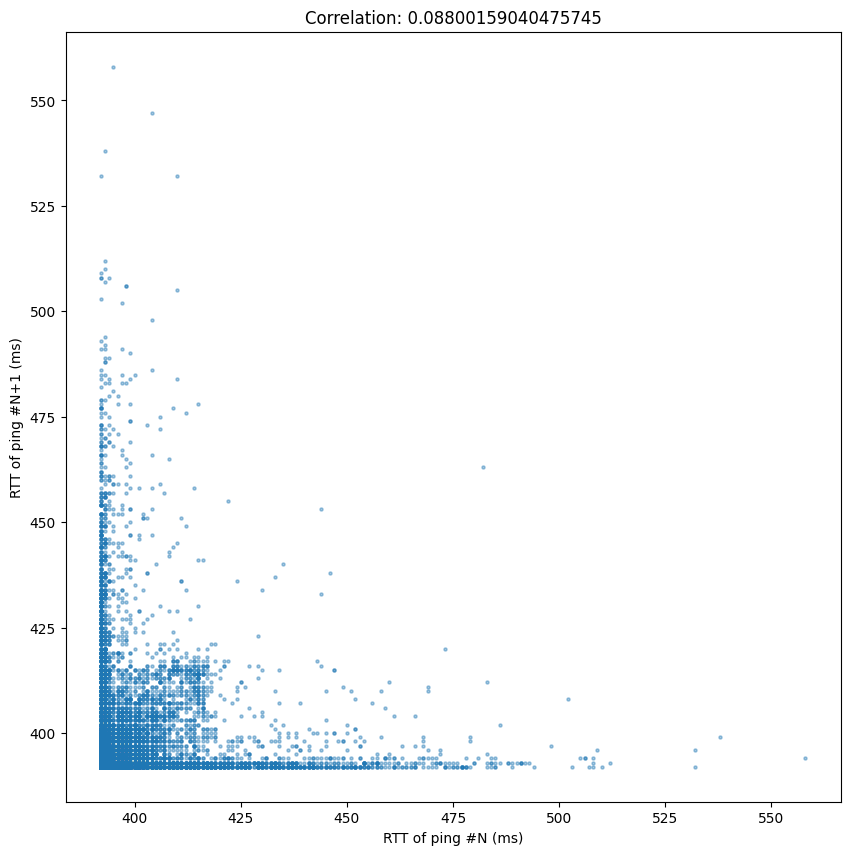

It shows that limited correlation between RTT of ping #N and RTT of ping #N+1. The correlation is 0.088, which is not strong.
While the overall correlation is weak, the dense cluster in the bottom-left corner of the scatterplot suggests some faint linearity for RTT values that are lower (around 400 ms). 


In [11]:
#Q9: Make a graph of the correlation between  “RTT of ping #N” and “RTT of ping #N+1”. The  x-axis  should  be  the  number  of  milliseconds  from  the  first  RTT,  and  the  y-axis should be the number of milliseconds from the second RTT. How correlated is the RTT over time


plt.figure(figsize=(10, 10))
plt.scatter(rtt[:-1], rtt[1:], alpha=0.4, s=5)
plt.xlabel("RTT of ping #N (ms)")
plt.ylabel("RTT of ping #N+1 (ms)")

plt.title(f"Correlation: {np.corrcoef(rtt[:-1], rtt[1:])[0, 1]}")

plt.show()
print('It shows that limited correlation between RTT of ping #N and RTT of ping #N+1. The correlation is 0.088, which is not strong.')
print('While the overall correlation is weak, the dense cluster in the bottom-left corner of the scatterplot suggests some faint linearity for RTT values that are lower (around 400 ms). ')

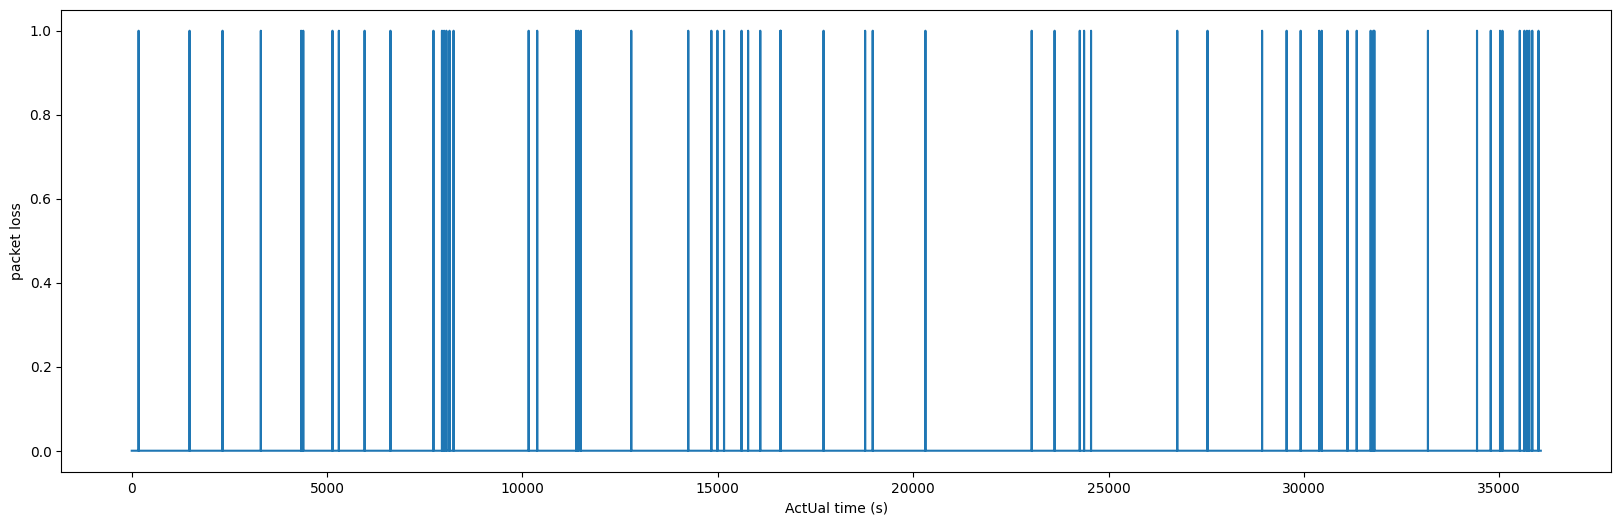

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(range(len(ack)), 1- ack)
plt.xlabel("ActUal time (s)")
plt.ylabel("packet loss")
plt.show()


In [13]:
#Q10 What are your conclusions from the data? Did the network path behave the way you were expecting?  What  (if  anything)  surprised  you  from  looking  at  the  graphs  and summary statistics?
print('Overall the RTT is almost steady, with few fluctuates. Overall Packet loss is low, and losses all happened in bursts. \nWhat surprises me is that the low correlation between RTT of ping #N and RTT of ping #N+1. I expected that the RTT of ping #N+1 would be relative to  RTT of ping #N, but it is not the case. ')
print('And the most surprising thing is that, even I pings the very slow server, the packet loss is still low. I expected that the packet loss would be high, but it is not the case. ')


Overall the RTT is almost steady, with few fluctuates. Overall Packet loss is low, and losses all happened in bursts. 
What surprises me is that the low correlation between RTT of ping #N and RTT of ping #N+1. I expected that the RTT of ping #N+1 would be relative to  RTT of ping #N, but it is not the case. 
And the most surprising thing is that, even I pings the very slow server, the packet loss is still low. I expected that the packet loss would be high, but it is not the case. 
